In [25]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt


# Save path to data set in a variable
data_file = "^usdrub_price-history-12-05-2022.csv"

# Use Pandas to read data
data_file_df = pd.read_csv(data_file)
data_file_df = data_file_df.dropna(how = "any")
data_file_df['Time'] = pd.to_datetime(data_file_df['Time'])
data_file_df = data_file_df.sort_values(by = "Time").reset_index()
data_file_df['%Chg'] = data_file_df['%Chg'].str.replace(r'%', '')
data_file_df

,index,Time,Open,High,Low,Last,Change,%Chg,Volume
0,518,2020-12-08,73.705,73.884,73.038,73.406,-0.300,-0.41,55468.0
1,517,2020-12-09,73.402,73.997,73.156,73.753,0.347,+0.47,47415.0
2,516,2020-12-10,73.741,73.875,72.961,73.060,-0.693,-0.94,61918.0
3,515,2020-12-11,73.057,73.396,72.865,73.007,-0.053,-0.07,55965.0
4,514,2020-12-14,73.013,73.931,72.785,73.824,0.817,+1.12,57278.0
...,...,...,...,...,...,...,...,...,...
514,4,2022-11-30,60.813,61.094,60.762,61.080,0.266,+0.44,302.0
515,3,2022-12-01,61.107,61.212,60.965,61.157,0.077,+0.13,99.0
516,2,2022-12-02,61.159,62.492,61.159,62.492,1.335,+2.18,349.0
517,1,2022-12-05,62.411,62.692,62.010,62.637,0.145,+0.23,285.0


In [28]:
data_file_df[["Time", "%Chg"]]

,Time,%Chg
0,2020-12-08,-0.41
1,2020-12-09,0.47
2,2020-12-10,-0.94
3,2020-12-11,-0.07
4,2020-12-14,1.12
...,...,...
514,2022-11-30,0.44
515,2022-12-01,0.13
516,2022-12-02,2.18
517,2022-12-05,0.23


In [29]:
data_file_df['%Chg'] = pd.to_numeric(data_file_df['%Chg'])
print(data_file_df.dtypes)

index              int64
Time      datetime64[ns]
Open             float64
High             float64
Low              float64
Last             float64
Change           float64
%Chg             float64
Volume           float64
dtype: object


In [30]:
data_file_df.set_index('Time')


,index,Open,High,Low,Last,Change,%Chg,Volume
Time,,,,,,,,
2020-12-08,518,73.705,73.884,73.038,73.406,-0.300,-0.41,55468.0
2020-12-09,517,73.402,73.997,73.156,73.753,0.347,0.47,47415.0
2020-12-10,516,73.741,73.875,72.961,73.060,-0.693,-0.94,61918.0
2020-12-11,515,73.057,73.396,72.865,73.007,-0.053,-0.07,55965.0
2020-12-14,514,73.013,73.931,72.785,73.824,0.817,1.12,57278.0
...,...,...,...,...,...,...,...,...
2022-11-30,4,60.813,61.094,60.762,61.080,0.266,0.44,302.0
2022-12-01,3,61.107,61.212,60.965,61.157,0.077,0.13,99.0
2022-12-02,2,61.159,62.492,61.159,62.492,1.335,2.18,349.0


In [31]:
data_file_df.dtypes

index              int64
Time      datetime64[ns]
Open             float64
High             float64
Low              float64
Last             float64
Change           float64
%Chg             float64
Volume           float64
dtype: object

In [32]:
data_file_df.loc[range(0,11)],["Time","%Chg"] and data_file_df.loc[range(203,214)],["Time","%Chg"]

(    index       Time    Open    High     Low    Last  Change  %Chg   Volume
 0     518 2020-12-08  73.705  73.884  73.038  73.406  -0.300 -0.41  55468.0
 1     517 2020-12-09  73.402  73.997  73.156  73.753   0.347  0.47  47415.0
 2     516 2020-12-10  73.741  73.875  72.961  73.060  -0.693 -0.94  61918.0
 3     515 2020-12-11  73.057  73.396  72.865  73.007  -0.053 -0.07  55965.0
 4     514 2020-12-14  73.013  73.931  72.785  73.824   0.817  1.12  57278.0
 5     513 2020-12-15  73.822  74.085  73.237  73.245  -0.579 -0.78  46591.0
 6     512 2020-12-16  73.250  73.693  73.226  73.295   0.050  0.07  45166.0
 7     511 2020-12-17  73.300  73.388  72.645  72.920  -0.375 -0.51  43602.0
 8     510 2020-12-18  72.922  73.872  72.922  73.371   0.451  0.62  47367.0
 9     509 2020-12-21  73.399  75.446  73.399  74.692   1.321  1.80  81673.0
 10    508 2020-12-22  74.689  75.932  74.547  75.890   1.198  1.60  58189.0,
      index       Time    Open    High     Low    Last  Change  %Chg   Volu

In [33]:
ukrainian_war = data_file_df.query("Time >= '02/10/2022' \
                       and Time < '02/25/2022'")
ukrainian_war

,index,Time,Open,High,Low,Last,Change,%Chg,Volume
305,213,2022-02-10,74.761,75.094,74.245,75.022,0.260,0.35,68487.0
306,212,2022-02-11,75.019,77.564,74.806,76.818,1.796,2.39,104768.0
307,211,2022-02-14,76.858,77.905,75.951,76.480,-0.338,-0.44,133732.0
308,210,2022-02-15,76.479,76.782,75.097,75.451,-1.029,-1.35,106426.0
309,209,2022-02-16,75.449,75.509,74.828,75.116,-0.335,-0.44,90118.0
310,208,2022-02-17,75.111,76.684,75.033,76.293,1.177,1.57,109668.0
311,207,2022-02-18,76.282,77.443,75.623,77.317,1.024,1.34,99423.0
312,206,2022-02-21,77.368,80.191,76.133,80.158,2.841,3.67,164548.0
313,205,2022-02-22,80.159,80.934,78.471,78.789,-1.369,-1.71,153070.0
314,204,2022-02-23,78.789,81.502,78.577,81.328,2.539,3.22,102519.0


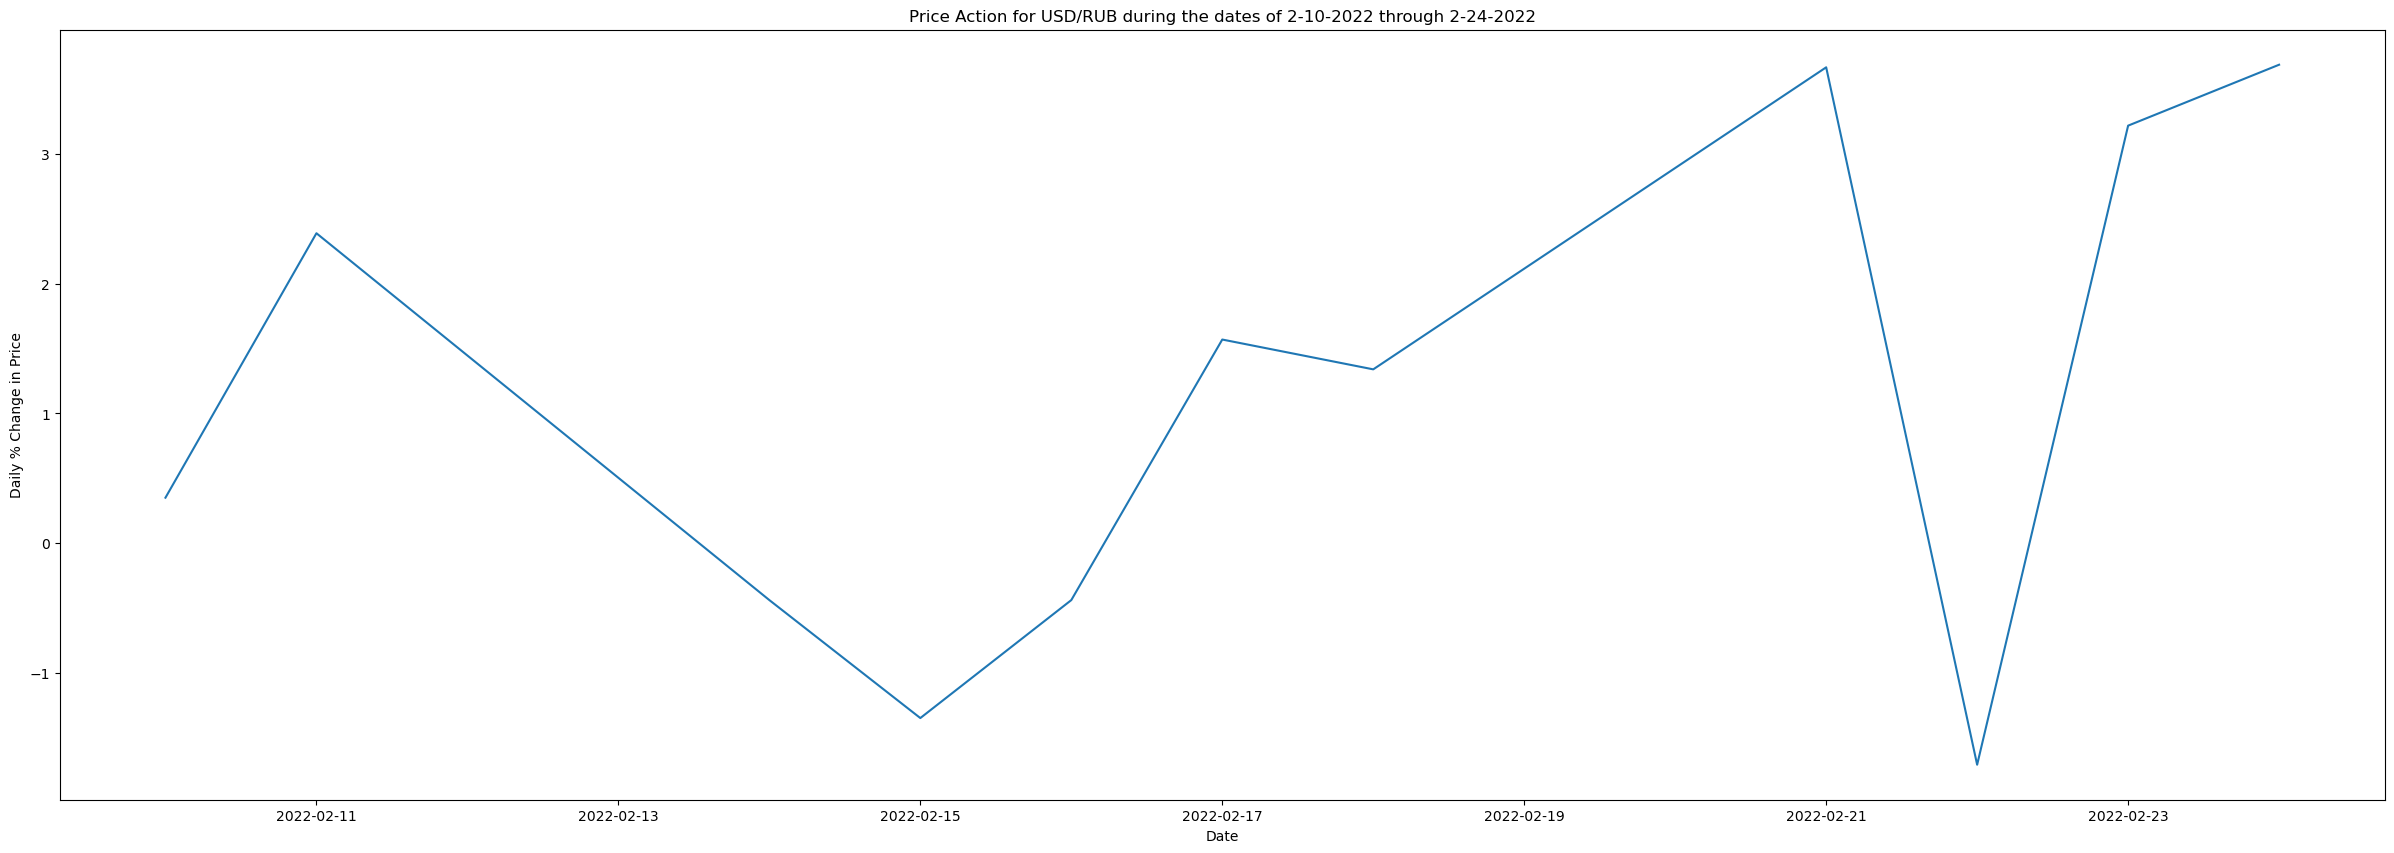

In [34]:
x = ukrainian_war['Time']
y = ukrainian_war['%Chg']
fig1, ax1 = plt.subplots(figsize=(30, 10))
plt.title('Price Action for USD/RUB during the dates of 2-10-2022 through 2-24-2022')
plt.xlabel("Date")
plt.ylabel("Daily % Change in Price")
plt.plot(x, y)
plt.show()

In [35]:
ukrainian_war = data_file_df.query("Time >= '11/22/2022' \
                       and Time < '12/06/2022'")
ukrainian_war

,index,Time,Open,High,Low,Last,Change,%Chg,Volume
508,10,2022-11-22,60.948,60.948,60.589,60.629,-0.344,-0.56,297.0
509,9,2022-11-23,60.630,60.782,60.403,60.597,-0.032,-0.05,268.0
510,8,2022-11-24,60.600,60.600,60.292,60.339,-0.258,-0.43,444.0
511,7,2022-11-25,60.337,60.777,60.336,60.743,0.404,0.67,381.0
512,6,2022-11-28,60.692,61.301,60.632,61.117,0.374,0.62,1531.0
513,5,2022-11-29,61.167,61.240,60.802,60.814,-0.303,-0.50,411.0
514,4,2022-11-30,60.813,61.094,60.762,61.080,0.266,0.44,302.0
515,3,2022-12-01,61.107,61.212,60.965,61.157,0.077,0.13,99.0
516,2,2022-12-02,61.159,62.492,61.159,62.492,1.335,2.18,349.0
517,1,2022-12-05,62.411,62.692,62.010,62.637,0.145,0.23,285.0


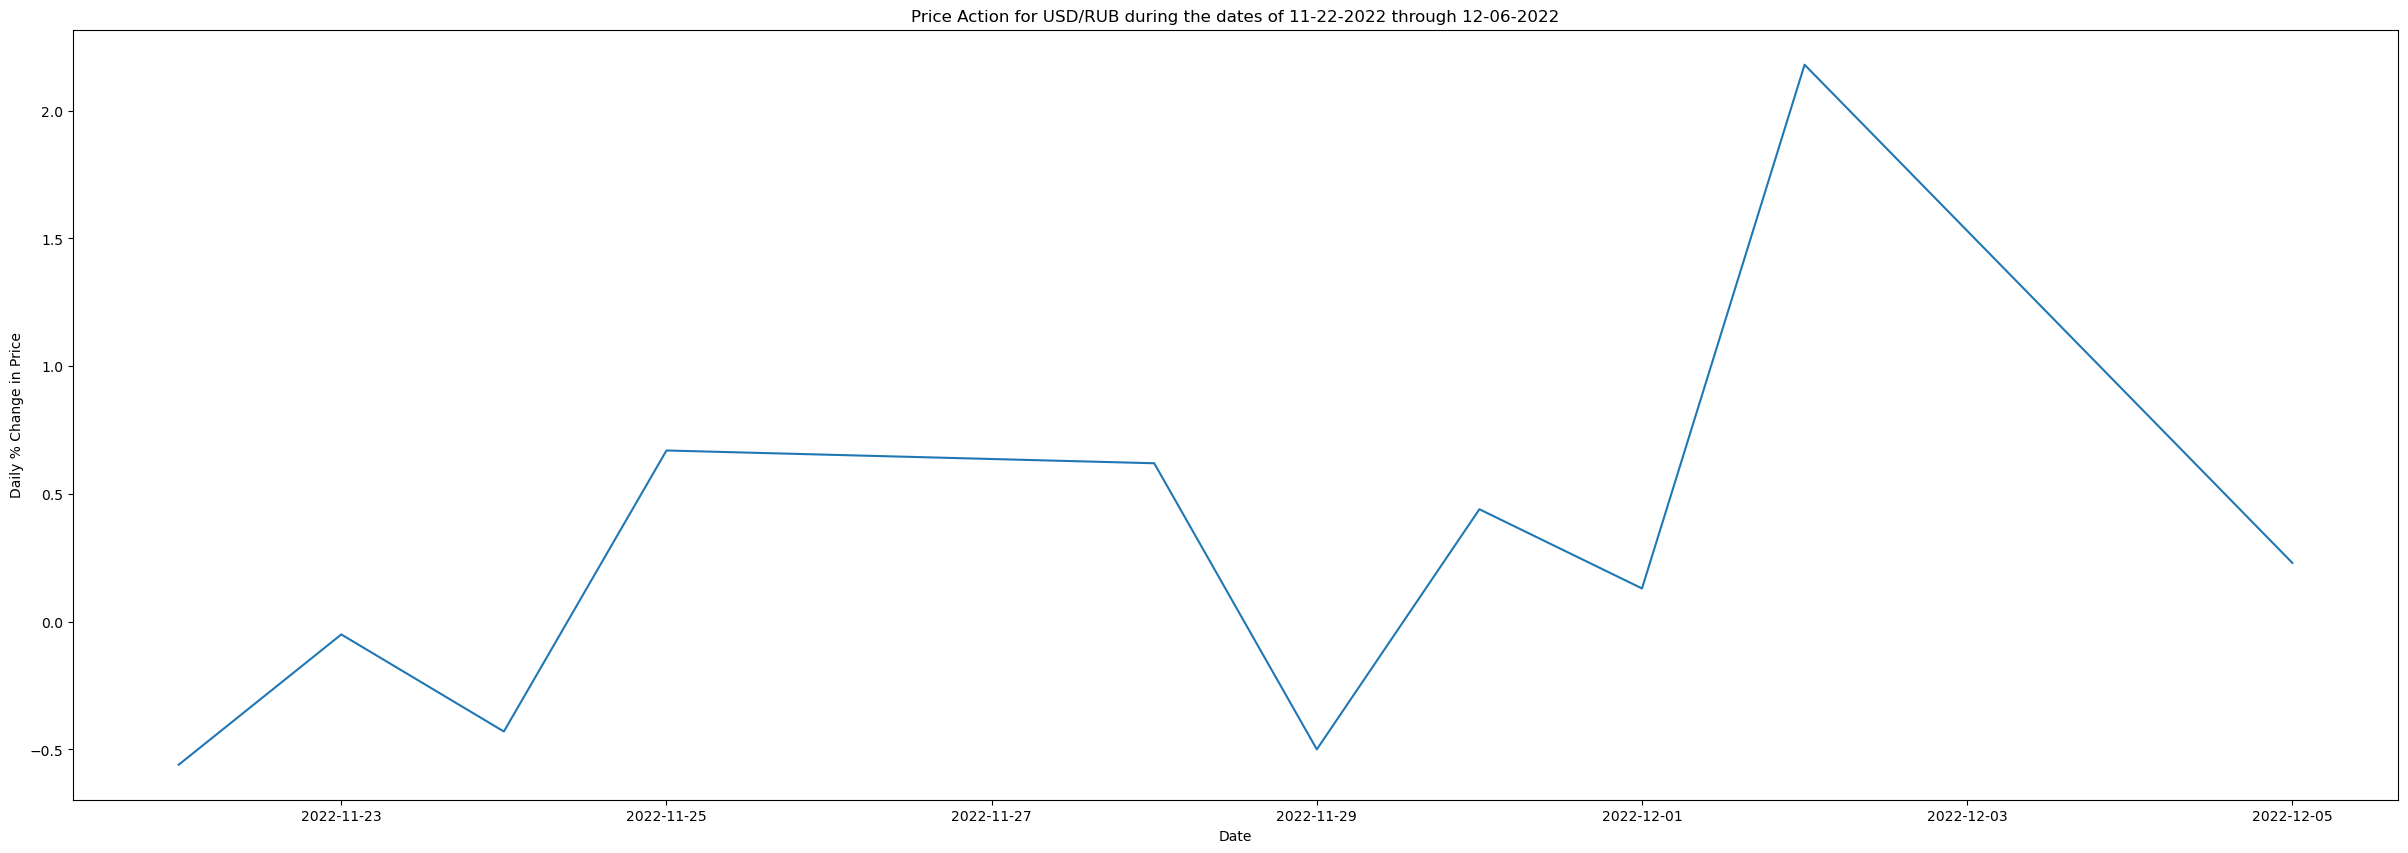

In [36]:
x = ukrainian_war['Time']
y = ukrainian_war['%Chg']
fig1, ax1 = plt.subplots(figsize=(30, 10))
plt.title('Price Action for USD/RUB during the dates of 11-22-2022 through 12-06-2022')
plt.xlabel("Date")
plt.ylabel("Daily % Change in Price")
plt.plot(x, y)
plt.show()